###### Created by Victor A. Ramirez Delgado

Suggestions by @fedhere

#**Homework 8**

The data used is coming from [UNICEF data base](https://data.unicef.org/). In this case the purspose of the data is to evaluat the mortality rate of children under five years old (measured in number of deaths per 1000 births) in Venezuela. Venezuela's social, economid can political crisis has caused unforswable damages in the entire poppulation's living standars; from forcing a mass migration of more than 4 million Venezuelans out of the country, to creating one the economy with the highest inflation rate in the world according to the [International Monetry Fund](https://in.reuters.com/article/venezuela-economy/imf-sees-venezuela-inflation-at-10-million-percent-in-2019-idINKCN1MJ1YX).

**Data Extraction**

In [0]:
import pandas as pd
import matplotlib.pylab as pl
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
!wget https://data.unicef.org/wp-content/uploads/2018/09/U5MR_mortality_rate_2019-1.xlsx

--2019-11-23 03:46:05--  https://data.unicef.org/wp-content/uploads/2018/09/U5MR_mortality_rate_2019-1.xlsx
Resolving data.unicef.org (data.unicef.org)... 104.22.8.122, 104.22.9.122, 2606:4700:10::6816:97a, ...
Connecting to data.unicef.org (data.unicef.org)|104.22.8.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘U5MR_mortality_rate_2019-1.xlsx.1’

U5MR_mortality_rate     [ <=>                ] 475.27K  --.-KB/s    in 0.02s   

2019-11-23 03:46:05 (26.9 MB/s) - ‘U5MR_mortality_rate_2019-1.xlsx.1’ saved [486674]



In [0]:
mv U5MR_mortality_rate_2019-1.xlsx "drive/My Drive/dsps"

In [10]:
ls "drive/My Drive/dsps"

 011400909.rw
 146879345.rw
 277023834.rw
 genes/
 H-H1_LOSC_16_V1-1126257414-4096.hdf5
 H-H1_LOSC_4_V1-1126257414-4096.hdf5
 higgsb/
'higgs-boson (1).zip'
 kaggleTitanic/
 L-L1_LOSC_16_V1-1126257414-4096.hdf5
 L-L1_LOSC_16_V1-1126257414-4096.hdf5.1
 L-L1_LOSC_4_V1-1126257414-4096.hdf5
 L-L1_LOSC_4_V1-1126257414-4096.hdf5.1
'nyc_pluto_19v1_csv (1).zip'
':persistentId?persistentId=doi:10.7910%2FDVN%2F9QKJU2%2FWOMIZQ'
 random_submission.zip
'SP.POP.TOTL?downloadformat=excel'
'SP.POP.TOTL?downloadformat=excel.1'
'SP.POP.TOTL?downloadformat=excel.2'
'SP.POP.TOTL?downloadformat=excel.3'
 test.zip
 training.zip
 U5MR_mortality_rate_2019-1.xlsx


**Reading the data**

In [0]:
mortalityr = pd.read_excel("U5MR_mortality_rate_2019-1.xlsx", sheet_name ='Country estimates', skiprows= 11)

In [14]:
mortalityr.head()

,ISO Code,Country Name,Uncertainty bounds*,1950.5,1951.5,1952.5,1953.5,1954.5,1955.5,1956.5,1957.5,1958.5,1959.5,1960.5,1961.5,1962.5,1963.5,1964.5,1965.5,1966.5,1967.5,1968.5,1969.5,1970.5,1971.5,1972.5,1973.5,1974.5,1975.5,1976.5,1977.5,1978.5,1979.5,1980.5,1981.5,1982.5,1983.5,1984.5,1985.5,1986.5,1987.5,1988.5,1989.5,1990.5,1991.5,1992.5,1993.5,1994.5,1995.5,1996.5,1997.5,1998.5,1999.5,2000.5,2001.5,2002.5,2003.5,2004.5,2005.5,2006.5,2007.5,2008.5,2009.5,2010.5,2011.5,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5
0,AFG,Afghanistan,Lower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.272064,299.868994,297.572932,294.244572,290.346249,285.903281,281.552569,276.739745,272.025056,267.092698,262.808426,258.191251,253.219183,248.531484,243.967666,239.026685,234.163590,228.955837,223.462960,218.276547,213.096262,207.680648,201.993417,196.687340,191.235249,185.748912,180.122746,174.680219,169.288870,163.938755,158.624808,153.608984,148.662327,143.918911,139.440118,135.361679,131.495333,127.783374,124.092846,120.309714,116.458836,112.572089,108.745177,104.784727,100.845235,96.923249,92.909959,88.920992,84.729588,80.635633,76.582401,72.504416,68.408678,64.361735,60.413584,56.929874,53.586512,50.427863
1,AFG,Afghanistan,Median,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.894227,345.337846,340.149016,334.921331,329.582650,324.341333,318.951508,313.583740,308.055431,302.709104,297.188819,291.663359,285.937058,280.395547,274.551653,268.697861,262.873299,256.749757,250.433338,243.939923,237.517516,231.006325,224.517658,217.979411,211.430695,204.841589,198.168768,191.614665,185.152852,178.772022,172.565398,166.677920,161.103446,155.757908,150.804475,146.127833,141.754005,137.533585,133.442065,129.377843,125.355003,121.226797,117.039735,112.804417,108.541833,104.299977,100.103800,95.946561,91.872054,87.951741,84.134583,80.466731,76.946254,73.553602,70.378269,67.451060,64.733878,62.276411
2,AFG,Afghanistan,Upper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408.473736,398.063011,388.904784,380.694307,373.512402,367.246094,361.133003,355.676946,349.813195,344.053835,338.459823,332.581288,326.464992,319.205484,312.166041,304.876117,297.385248,290.252955,282.410402,275.151255,267.573868,259.930811,252.154879,243.842505,235.603683,227.335692,218.761784,210.447107,202.564895,194.785793,187.429143,180.654038,174.337020,168.452887,162.906631,157.819158,152.861129,148.229930,143.658816,139.263676,134.935320,130.567594,126.017295,121.407792,116.879241,112.470707,108.044246,103.785511,99.764211,95.936969,92.427887,89.135537,86.104367,83.347847,80.866655,78.660487,76.773117,75.388862
3,ALB,Albania,Lower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.870274,60.987273,59.057519,56.816587,54.344914,51.704898,49.256146,46.772792,44.282787,41.922470,39.782418,37.877049,36.153580,34.611987,33.200791,31.869925,30.589079,29.262347,27.923958,26.605433,25.291099,23.955386,22.685560,21.423018,20.214917,19.060899,17.968614,16.965182,15.984864,15.063604,14.176655,13.330136,12.497835,11.702867,10.943653,10.263327,9.678859,9.231959,8.880925,8.573231,8.249231
4,ALB,Albania,Median,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.271465,87.711240,80.804006,74.455740,68.567716,63.374841,58.738165,54.632151,51.010575,47.871515,45.102807,42.711483,40.679107,38.918426,37.363136,35.908000,34.529018,33.161054,31.739362,30.281129,28.803422,27.362374,25.930495,24.508793,23.124638,21.769409,20.450229,19.167650,17.906862,16.680388,15.506995,14.384156,13.304655,12.304361,11.413321,10.653732,10.047410,9.595161,9.268774,9.022223,8.823329


#**Data from Venezuela**

In [0]:
venmort = mortalityr[mortalityr['ISO Code'] == 'VEN']

In [16]:
venmort.head()

,ISO Code,Country Name,Uncertainty bounds*,1950.5,1951.5,1952.5,1953.5,1954.5,1955.5,1956.5,1957.5,1958.5,1959.5,1960.5,1961.5,1962.5,1963.5,1964.5,1965.5,1966.5,1967.5,1968.5,1969.5,1970.5,1971.5,1972.5,1973.5,1974.5,1975.5,1976.5,1977.5,1978.5,1979.5,1980.5,1981.5,1982.5,1983.5,1984.5,1985.5,1986.5,1987.5,1988.5,1989.5,1990.5,1991.5,1992.5,1993.5,1994.5,1995.5,1996.5,1997.5,1998.5,1999.5,2000.5,2001.5,2002.5,2003.5,2004.5,2005.5,2006.5,2007.5,2008.5,2009.5,2010.5,2011.5,2012.5,2013.5,2014.5,2015.5,2016.5,2017.5,2018.5
570,VEN,Venezuela (Bolivarian Republic of),Lower,NaN,80.217572,80.220824,79.885374,79.167725,78.108013,76.959132,75.605860,74.044384,72.284536,70.427783,68.650820,66.936831,65.273143,63.847668,62.665970,61.361438,60.224186,59.064864,57.721286,56.311205,54.829976,53.222610,51.541232,49.907044,48.226685,46.595773,45.004450,43.380055,41.766228,40.118487,38.519376,37.045961,35.695677,34.503364,33.418971,32.394930,31.468576,30.537342,29.633673,28.738554,27.930421,27.240428,26.668343,26.228698,25.720529,24.983481,24.039284,23.007427,26.984276,21.146841,20.496760,19.953001,19.388386,18.768752,18.126403,17.565102,17.115117,16.800490,16.678383,16.669075,16.755381,16.870079,16.913655,16.787154,18.419645,22.588944,21.806190,20.981858
571,VEN,Venezuela (Bolivarian Republic of),Median,NaN,115.852643,110.753989,106.044834,101.408786,97.012339,92.960460,89.101572,85.550506,82.205637,79.206766,76.592955,74.419818,72.583336,70.991993,69.561037,68.245893,66.921595,65.490540,63.947674,62.265173,60.447116,58.628529,56.853823,55.079736,53.324044,51.570991,49.749233,47.836955,45.854889,43.891911,42.037270,40.303981,38.742518,37.342757,36.030699,34.741775,33.428967,32.098480,30.768759,29.546887,28.531160,27.745266,27.169698,26.728291,26.218203,25.464417,24.504790,23.470407,27.530821,21.594585,20.906686,20.334829,19.753960,19.116276,18.472764,17.898135,17.439718,17.138362,17.005502,17.002016,17.086155,17.204822,17.301244,17.343169,19.429031,24.509065,24.509065,24.509065
572,VEN,Venezuela (Bolivarian Republic of),Upper,NaN,167.402249,152.524592,140.360497,129.321924,120.152386,112.087201,104.941331,98.733367,93.421528,89.096350,85.688484,83.024563,80.766864,78.924083,77.320996,75.743492,74.193555,72.414452,70.563671,68.545418,66.475947,64.499069,62.589194,60.811775,59.020611,57.171915,55.205492,52.985777,50.656303,48.235085,46.036489,44.052415,42.214975,40.544879,38.927157,37.241993,35.479265,33.697015,31.925607,30.387601,29.159486,28.276609,27.676366,27.214569,26.718700,25.952039,24.988184,23.955644,28.097272,22.053100,21.316567,20.717524,20.129708,19.470378,18.828773,18.240522,17.769060,17.468466,17.337503,17.353804,17.437720,17.550003,17.692864,17.914493,20.491439,26.572017,27.511442,28.653579


In [17]:
venmort.columns[3:].dtype

dtype('O')

In [0]:
time = pd.to_numeric(venmort.columns[3:])
lower = venmort.iloc[0]
median = venmort.iloc[1]
upper = venmort.iloc[2]

In [19]:
time[time > 1990]

Float64Index([1990.5, 1991.5, 1992.5, 1993.5, 1994.5, 1995.5, 1996.5, 1997.5,
              1998.5, 1999.5, 2000.5, 2001.5, 2002.5, 2003.5, 2004.5, 2005.5,
              2006.5, 2007.5, 2008.5, 2009.5, 2010.5, 2011.5, 2012.5, 2013.5,
              2014.5, 2015.5, 2016.5, 2017.5, 2018.5],
             dtype='float64')

In [26]:
lower[3:]

1950.5        NaN
1951.5    80.2176
1952.5    80.2208
1953.5    79.8854
1954.5    79.1677
           ...   
2014.5    16.7872
2015.5    18.4196
2016.5    22.5889
2017.5    21.8062
2018.5    20.9819
Name: 570, Length: 69, dtype: object

In [31]:
# had to add this cell
selected = ~(np.isnan(lower[3:].astype(float)) + np.isnan(upper[3:].astype(float)))

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


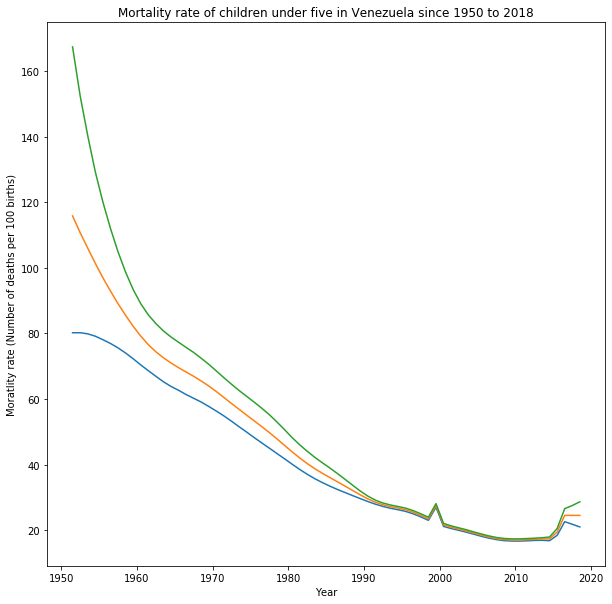

In [34]:
pl.figure(figsize = (10,10))
pl.plot(time,lower[3:])
pl.plot(time,median[3:])
pl.plot(time,upper[3:])
pl.xlabel('Year')
pl.ylabel('Moratlity rate (Number of deaths per 100 births)')
pl.title('Mortality rate of children under five in Venezuela since 1950 to 2018');

**Figure 1:** Mortality rate in Venezuela since the earliest data that UNICEF has, dating from 1950, and goes to the lastest data of the second half of 2018. It shows three different lines each one of them representing the upper and lower limites of the numbers, and their median in the center.This graph is gives a good reference of how much the numbers have decreased in more than 5 decades as the country continued to develop. The graph is not useful to stuy what we are interested on since it has a lot of data that we don't want to take into consideration into our analysis.Besides, the graph doesn't have a legend for the three lines and it is not very easy to read. 

#**Focusing in the time of the crisis**

Now the next part will be to take the data that we are interested in observing based on the period of time that we are studying. The beginning of the socialist regime started in 1999 with the election of president Hugo Chávez. His death in 2013 lead to his successor Nicolás Maduro to take the power and to continue Chávez plans. After Maduro's possession of power, the results of years of corruption, public debt and mismanagement of the resources were starting to take place into the country. With this background information, the data should show this change in people's living condition after Maduro's rule started. The graph that I aiming to recreat is the one developed by UNICEF in website associated with the Venezuela's latest [data](https://data.unicef.org/country/ven/).

Text(1990, 14, "Data taken from UNICEF's Data")

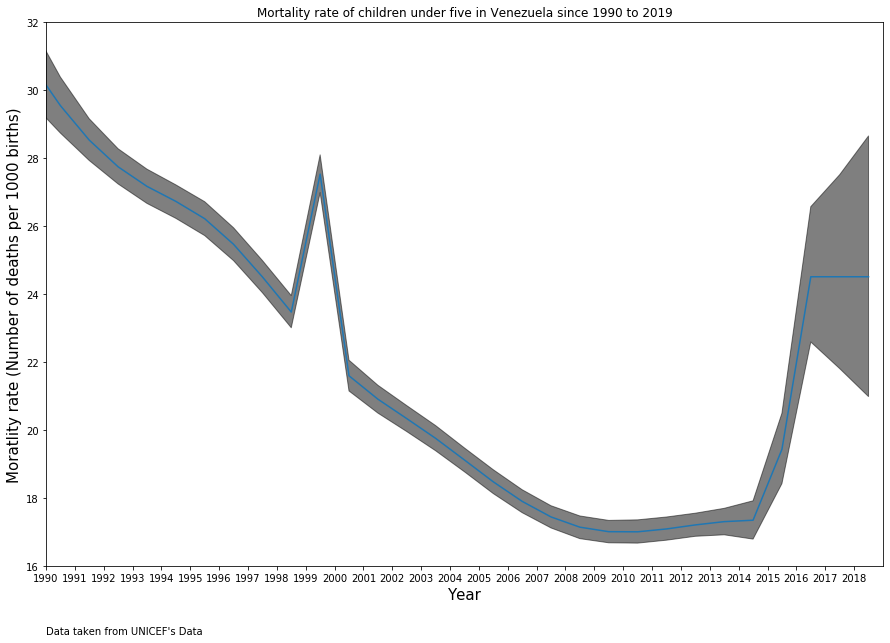

In [35]:
pl.figure(figsize = (15,10))
pl.xlim(1990, 2019)
pl.ylim(16, 32)
pl.fill_between(time.values, lower[3:].astype(float), upper[3:].astype(float), alpha=0.5, color='k')
pl.plot(time,median[3:], '-')
pl.xticks(time[(time>1990)] -0.5)
pl.xlabel('Year', fontsize = 15)
pl.ylabel('Moratlity rate (Number of deaths per 1000 births)', fontsize = 15)
pl.title('Mortality rate of children under five in Venezuela since 1990 to 2019')
pl.text(1990, 14, "Data taken from UNICEF's Data")

**Figure 2:** The graph shows the data from 1990 to the second half of 2018. there is a noticeable change in the trend of the data, from coming to a constant decrease, the numbers start to flatten and spike up around 2014. This graph still has a few different flaws on it: the legend is still missing for each line, the colors of two lines are blue and green which can make a person who is color blind to don't be able to distinguish the difference in color, there are a lot of ticks in the x-axis and they are too close to one another, and the proportions between the size of the x and y labels are very different than the size of the ticks.

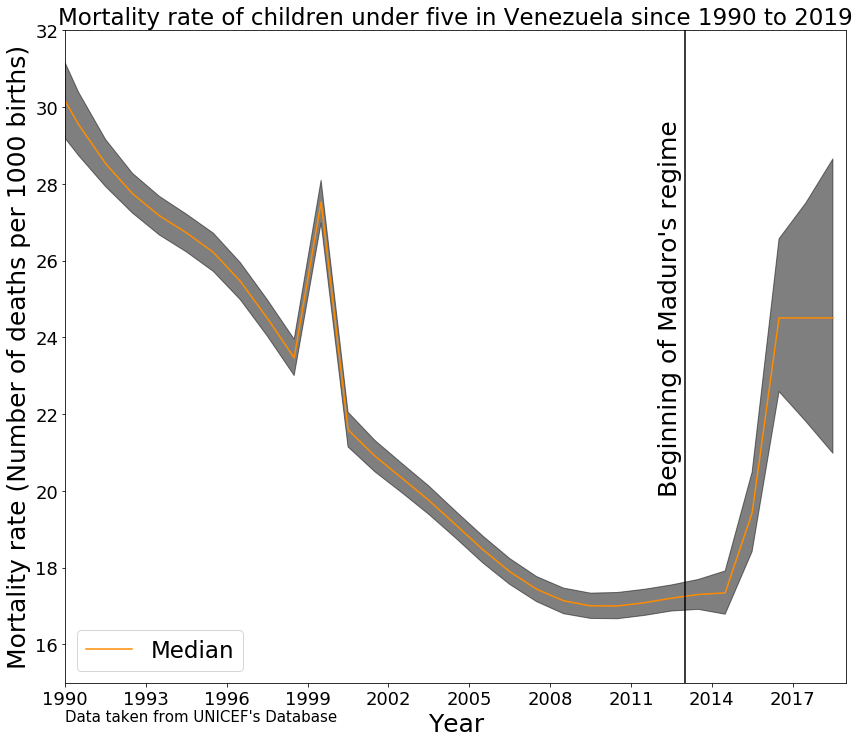

In [63]:
pl.figure(figsize = (14,12))
pl.xlim(1990, 2019)
pl.ylim(15, 32)
pl.fill_between(time.values, lower[3:].astype(float), upper[3:].astype(float), alpha=0.5, color='k')
pl.plot(time,median[3:], '-', label = 'Median', c ='darkorange')
pl.axvline(x=2013, c = 'k', ls = '-')
pl.xticks(np.arange(1990, 2020, 3), fontsize = 18)
pl.yticks(fontsize = 18)
pl.legend(fontsize = 23, loc=3)
pl.xlabel('Year', fontsize = 25)
pl.ylabel('Mortality rate (Number of deaths per 1000 births)', fontsize = 25)
pl.title('Mortality rate of children under five in Venezuela since 1990 to 2019', fontsize = 23)
pl.text(1990, 14, "Data taken from UNICEF's Database", fontsize=15);
pl.text(2012, 20, "Beginning of Maduro's regime", rotation=90, fontsize=25); 
pl.savefig("Madurosmortality.png")

**Figure 3:** The last graph represents the same data as the previous graph but making it easier to understand and to draw the conclusion of our analysis. This graph clearly shows the moment when the change of government occurred, making it easier to the reader to observe how much the mortality rate increased with the new regime. The graph is also more visually appealing with the legend added to the bottom left, where there was a lot of white space not used. The number of ticks in the x axis have also been reduced to avoid saturating the graph, while still being able to determine years that the data is coming from. Finally, the font for the labels and the ticks are more proportional to one another making it easier to read